## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Инструкция по выполнению проекта
### Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv.
### Шаг 2. Подготовьте данные

    - Замените названия столбцов (приведите к нижнему регистру);
    - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
    - Обработайте пропуски при необходимости:
        Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
        Опишите причины, которые могли привести к пропускам;
        Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
    - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Шаг 3. Проведите исследовательский анализ данных

    - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    - Не учитывайте в работе данные за предыдущие годы.
    - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    - Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
    - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    - Соотнесите выводы с продажами игр на других платформах.
    - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Шаг 5. Проверьте гипотезы

    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:

    - Как вы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.

### Шаг 6. Напишите общий вывод
Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы долларов)
    EU_sales — продажи в Европе (миллионы долларов)
    JP_sales — продажи в Японии (миллионы долларов)
    Other_sales — продажи в других странах (миллионы долларов)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np, scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


необходимо будет заменить тип данных:
    - User_Score - тип object заменим на float. 
    - Year_of_Release - тип float заменим на int

Посмотрим можно ли восстановить 2 значения в столбце Name.

Cтолбцы Critic_Score, Rating, User_Score, Year_of_Release - содержат большое кол-во пропусков.

In [5]:
#посмотрим какие платформы есть и их кол-во
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [6]:
#посмотрим какие жанры есть и их кол-во
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [7]:
#посмотрим какие значения в Rating есть и их кол-во
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [8]:
#посмотрим какие значения есть в User_Score 
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
#посмотрим сколько таких значений 'tbd' у нас:
len(games.query("User_Score == 'tbd'"))

2424

2424 значений 'tbd', которые являются для нас тоже NaN

In [10]:
#посмотрим какие значения есть в Year_of_Release
games['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [11]:
#проверим дубликаты:
games.duplicated().sum()

0

In [12]:
#посмотрим на кол-во пропусков:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Пропуски в значениях Year_of_Release попробуем заполнить для игр по другим платформам

Будем заполнять пропуски в рейтингах значением "-1", т.к. их заполнение каким-либо средним или другим значением может исказить нам анализ.

## Шаг 2. Подготовим данные

In [13]:
#Приведем все названия к нижнему регистру
games.columns = games.columns.str.lower()

In [14]:
#для user_score проведем замену значений NaN, и 'tbd' на значение -1, а также приведем значения столбца к числовому:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')
games['user_score'] = games['user_score'].fillna(-1)

In [15]:
#для critic_score проведем замену значений NaN на -1 тоже
games['critic_score'] = games['critic_score'].fillna(-1)

In [16]:
#посмотрим на пропуски в name:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,NaN


для этих 2 игр ничего нельзя сделать, чтобы восставновить значения, избавимся от них.

In [17]:
games.drop(games[games['name'].isnull()].index , inplace=True)

In [18]:
#посмотрим на игры с пропусками в year_of_release:
games[games['year_of_release'].isnull()]['name'].value_counts()

LEGO Harry Potter: Years 5-7                   7
Happy Feet Two                                 4
Rock Band                                      4
Bejeweled 3                                    3
Test Drive Unlimited 2                         3
                                              ..
National Geographic Challenge!                 1
LEGO Indiana Jones: The Original Adventures    1
Call of Duty: Black Ops                        1
Namco Museum                                   1
Face Racers: Photo Finish                      1
Name: name, Length: 232, dtype: int64

попробуем заполнить пропуски в year_of_release для игр взяв данные по году выпуска из других платформ, предполагая, что издатель игр при запуске игры одновременно запускал ее на всех платформах

In [19]:
#функция для заполнения пропусков year_of_release по name
not_null_year = games[games['year_of_release'].notnull()]
def fill_null_year(row, **kwargs):
    rows = not_null_year[not_null_year['name'] == row['name']]
    if len(rows) > 0:
        return rows.iloc[0]['year_of_release']
    
    return row['year_of_release']

In [20]:
#заполним значения и приведем тип к целочисленному
games['year_of_release'] = games.apply(fill_null_year, axis=1).astype('Int64')

In [21]:
#посмотрим на результат
games.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

к сожалению, полностью заполнить пропуски в year_of_release не получилось, осталось еще 146 значений

In [22]:
#добавим столбец с суммой продаж во всех регионах
games['sales_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [23]:
#посмотрим результат
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38


## Шаг 3. Проведем исследовательский анализ данных

In [24]:
#Количество выпущенных игр по годам:
games_per_year = (
    games[['name', 'year_of_release']]
            .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release')
)

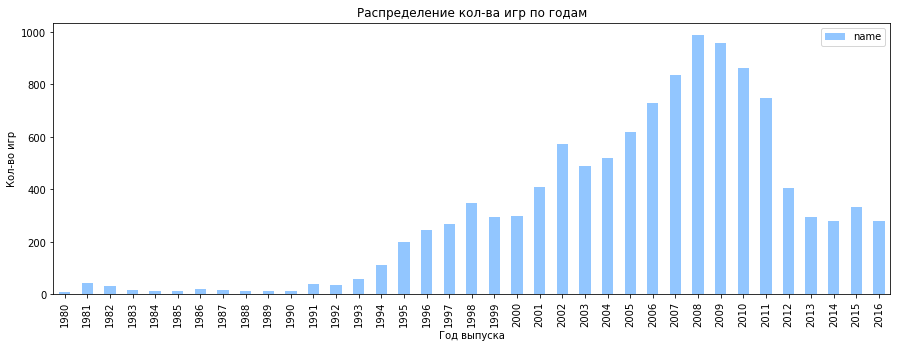

In [25]:
#построим диаграмму игр по кол-ву выпусков за год:
plt.style.use('seaborn-pastel')
plot = games_per_year.plot(kind='bar', y='name', figsize=(15,5), title='Распределение кол-ва игр по годам').set(xlabel='Год выпуска', ylabel='Кол-во игр')

До 1994г. было выпущено очень мало игр и до этого года данные нам не важны. Далее происходил рост числа выпускаемых игр с пиковыми скачками в 1998г. и 2020г. Наибольшее кол-во игр было выпущено в 2008г, после чего начался спад производства с резким падением в 2012, который скорее всего связан с развитием мобильных телефонов. Падал спрос на игры и уменьшалось кол-во разработок игр.

#### Дополнено:

Для анализа будем использовать период с 2013 года, т.к. в этом году уже закончилось падение на рунке, ситуация по продажам стабилизировалась, уже вышло большинство обновлений для плафторм (т.е. мы сможем взять наиболее современнные платформы) и 4 года - достаточно большой период для отслеживания тенденций на рынке.

In [26]:
#Продажи по платформам
def platform_sales(df):
    return (
        df
            .pivot_table(index='platform', values='sales_total', aggfunc='sum')
            .sort_values('sales_total', ascending=False)
    )

In [27]:
#функция для построения диаграммы продажи по платформам:
def plot_bar(df):
    (df
        .plot(kind='bar', y='sales_total', figsize=(10, 5), legend=False)
        .set(xlabel='Платформа', ylabel='Продажи')
    )
    plt.show()

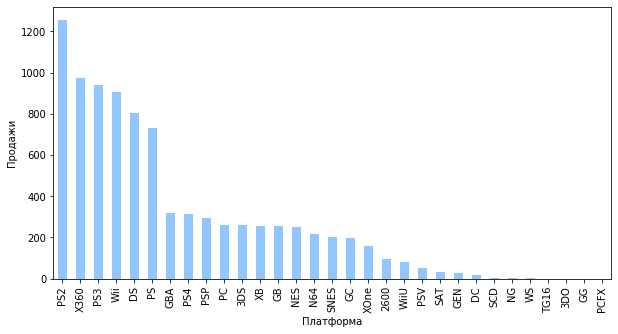

In [28]:
#Построим диаграмму продажи по платформам за все время
plot_bar(platform_sales(games))

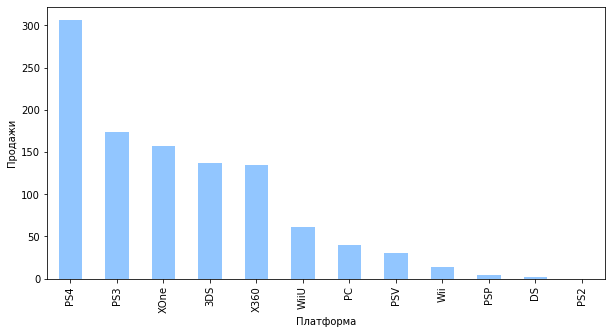

In [29]:
#Построим диаграмму продажи по платформам за выбранный для анализа период (с 2013)
plot_bar(platform_sales(games.query("year_of_release>=2013")))

Возьмем <del>6 игр</del> 6 платформ, которые имеют наибольший продажи и значительно отличаются от остальных.
Для анализа будем использовать только данные за актуальные года.

In [30]:
top_platforms = platform_sales(games.query("year_of_release>=2013")).head(6)
top_platforms

,sales_total
platform,
PS4,306.64
PS3,173.98
XOne,157.04
3DS,136.88
X360,134.24
WiiU,61.62


In [31]:
#сохраним для использования список топ платформ
top_platforms_list = list(top_platforms.index)

In [32]:
#Продажи по платформе по годам
def total_sales_platform(name, df):
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

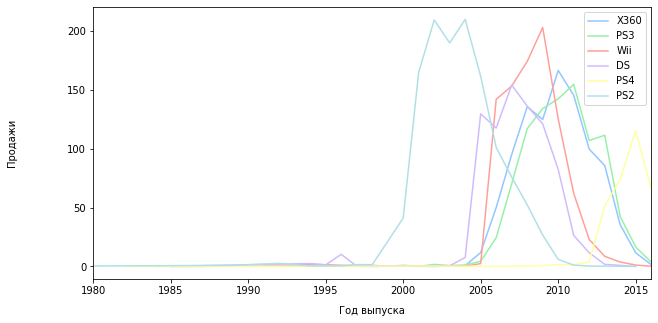

In [33]:
#График продаж игр по Топовым платформам по годам
for platform in list(platform_sales(games.query("year_of_release>2005")).head(6).index):
    total_sales_platform(platform, games)['sales_total'].plot(figsize=(10, 5), label=platform)
    plt.xlabel("Год выпуска", labelpad=10)
    plt.ylabel("Продажи", labelpad=50)
    plt.legend()

##### определим за какой срок появляются новые и исчезают старые платформы:
    - PS:  с 1994 по 2003 г. - 10 лет; 
    - PS2: с 2000 по 2011 г. - 11 лет; 
    - PS3: с 2006 по 2016 г. (падение в 2013 году из-за появления PS4; спад в 2016 г. или неполные данные) - 10 лет; 
    - DS:  с 2004 по 2013 г. (появилась в 1985, но потом нету данных, скорее всего, потому что не собирались; пик в 2008 г.) - 8 лет; 
    - Wii: с 2006 по 2016 г. (спад в 2016 г. или неполные данные) - 10 лет.
    - X360: с 2005 по 2016 г. (спад в 2016 г. или неполные данные) - 11 лет.

10 лет - характерный срок, когда появляются новые и исчезают старые платформы.Данные за все периоды нам не понадобятся 

Актуальный период для анализа: 2013-2016 г.

#### дополнено:

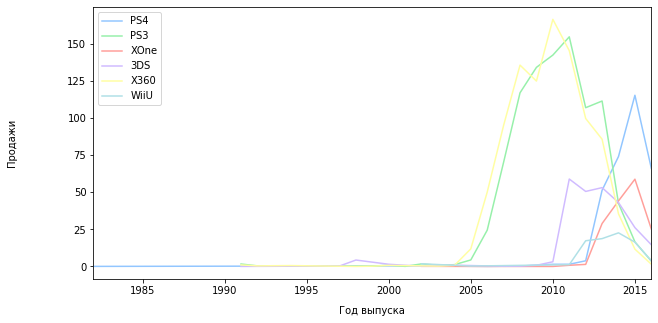

In [34]:
#График продаж игр по Топовым платформам по годам за акутальный для анализа период
for platform in list(top_platforms.index):
    total_sales_platform(platform, games)['sales_total'].plot(figsize=(10, 5), label=platform)
    plt.xlabel("Год выпуска", labelpad=10)
    plt.ylabel("Продажи", labelpad=50)
    plt.legend()

наиболее приоритетные платформы для рассмотрения: PS4, XOne, 3DS, которые имеют наибольшее кол-во продаж в 2016 г.
далее идут платформы: PS3, X360, WiiU

In [35]:
#продажи за актуальный период по платформам:
total_sales = games.query("year_of_release>2013").pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values('sales_total', ascending=False)

In [36]:
total_sales

,sales_total
platform,
PS4,255.34
XOne,128.14
3DS,83.81
PS3,62.60
X360,48.58
WiiU,42.88
PC,26.03
PSV,18.59
Wii,5.12


### Какие платформы лидируют по продажам, растут или падают

In [37]:
actual_period = (games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)
games_actual_period = games.loc[actual_period]

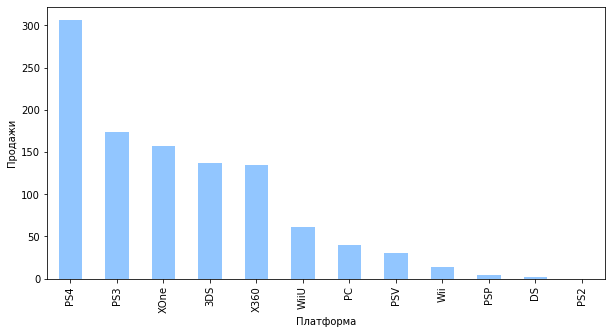

In [38]:
total_sales = platform_sales(games_actual_period)
plot_bar(total_sales)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 2015.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


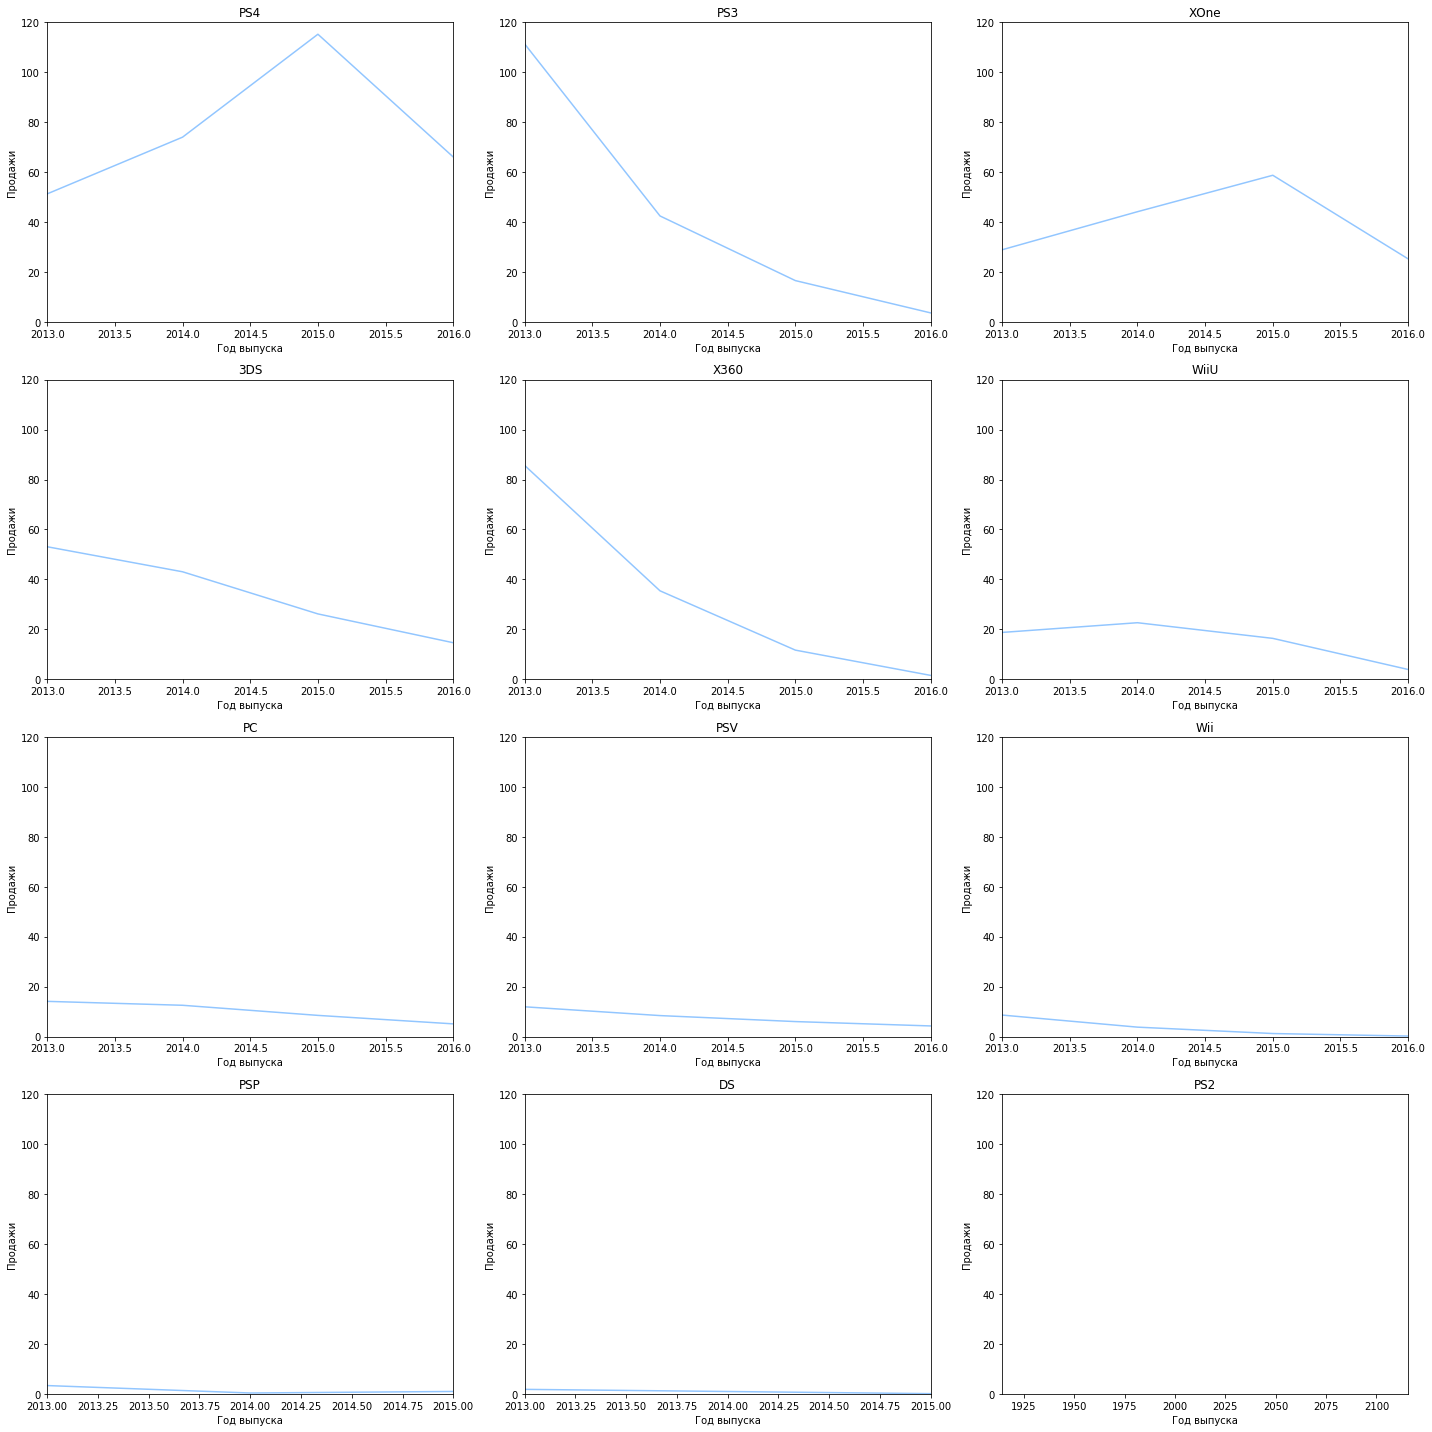

In [39]:
#посмотрим графики продаж по каждой платформе по году выпуска
platforms = list(total_sales.index)
rows = 4
cols = len(platforms) // rows
fig, ax = plt.subplots(rows, cols)

num = 0
for row in range(rows):
    for col in range(cols):
        platform = platforms[num]
        (total_sales_platform(platform, games_actual_period)['sales_total']
            .plot(ax=ax[row, col], figsize=(20, 20), title=platform)
            .set(xlabel='Год выпуска', ylabel='Продажи', ylim=(0,120))
        )
        num += 1
        
plt.tight_layout()
plt.show()

По последним данным лидируют по продажам платформы: PS4, Xone, 3DS. Они и являются наиболее перспективными и приоритетными. 
Далее идут платформы: PS3, X360, WiiU
Возможно стоит обратить отдельно внимание на WiiU, т.к. она появилась только в 2011 г. и может быть перспективной на локальном рынке.

Продажи игр по всем платформам падают, в том числе и в 2016 г., хотя, возможно, это связано с тем, что по условиям данные за 2016 год могут быть неполными.
Причиной падения, скорее всего явялется развитие мобильных устройств.

In [40]:
#Функция для boxplot
def boxplot_sales(query = None):
    %matplotlib inline
    if query == None:
        ax = games.boxplot(column='sales_total', figsize=(25,10), fontsize=25)
    else:
        df_query = games.query(query)
        by_column = query.split()[0]
        ax = df_query.boxplot(column='sales_total', by=by_column, figsize=(25,10), fontsize=25)
        
    Q1 = np.quantile(games['sales_total'], 0.09, interpolation='midpoint')
    Q3 = np.quantile(games['sales_total'], 0.91, interpolation='midpoint')
    #ax.set_ylim([Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)])
    ax.set_ylim(0, 2.0)

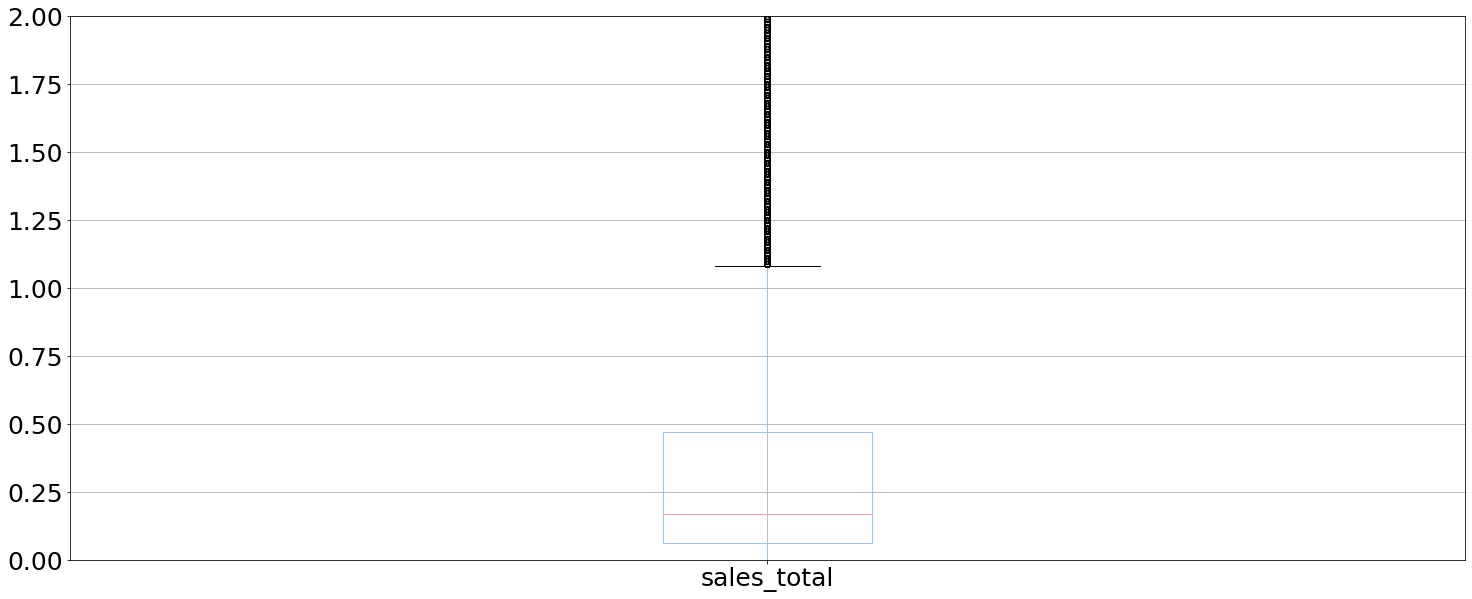

In [41]:
#посмотрим boxplot по продажам игр
boxplot_sales()

Продажи игр в среднем составляют до 1,08 млн.$

Медиана - 0,17 млн.$

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


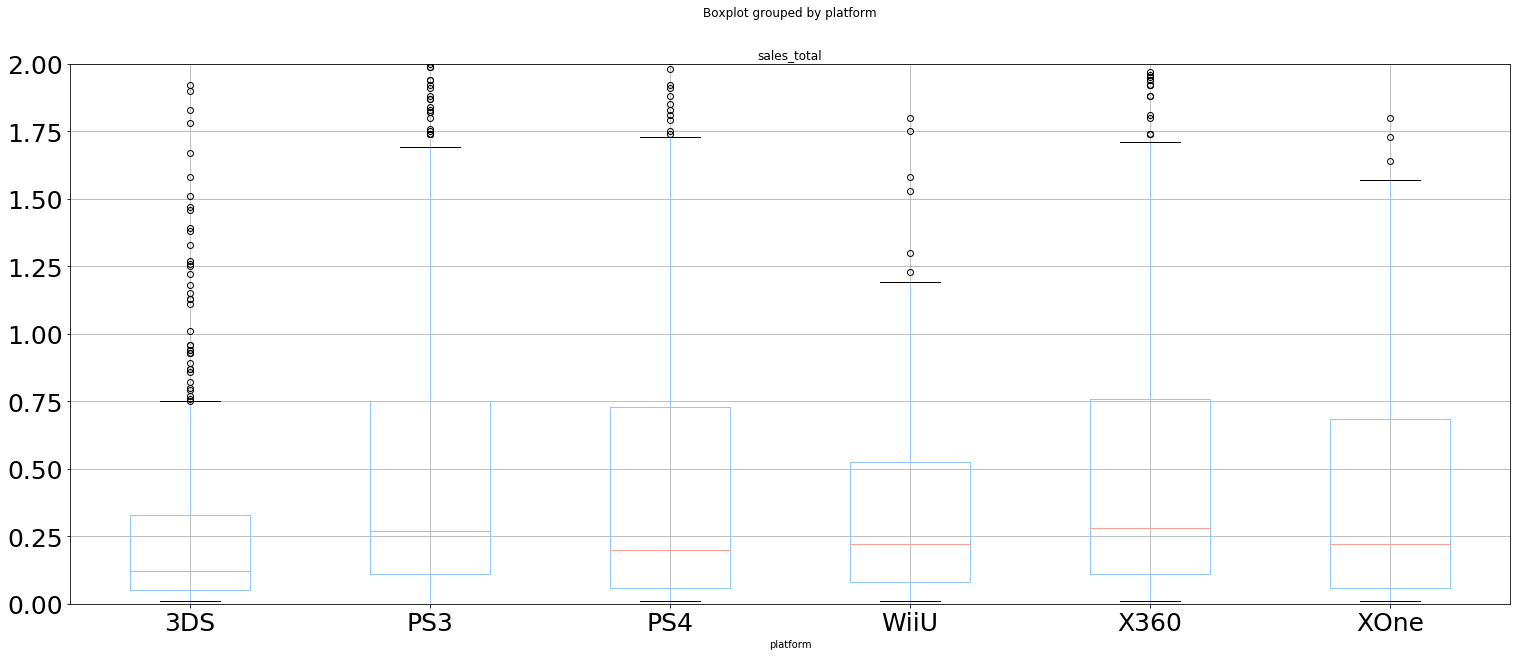

In [42]:
#посмотрим boxplot по всем платформам из топ
boxplot_sales(query="platform in @top_platforms_list")

In [45]:
games.query("platform in @top_platforms_list")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,-1.0,-1.0,T,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01


Медиана по топовым платформам составляет от 0,2 до 0,27 млн $. 
Кроме 3DS - у нее 0,13 млн 

Верхняя граница предела для PS4 - 1,73 млн $. 

Верхняя граница предела для X360 - 1,71 млн $.

Верхняя граница предела для PS3 - 1,68 млн $. 

Верхняя граница предела для XOne - 1,57 млн $. 

Верхняя граница предела для WiiU - 1,19 млн $.

Верхняя граница предела для 3DS - 0,75 млн $. 



### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

рассмотрим как влияют отзывы пользователей и критиков на продажи внутри платформы на примере X360

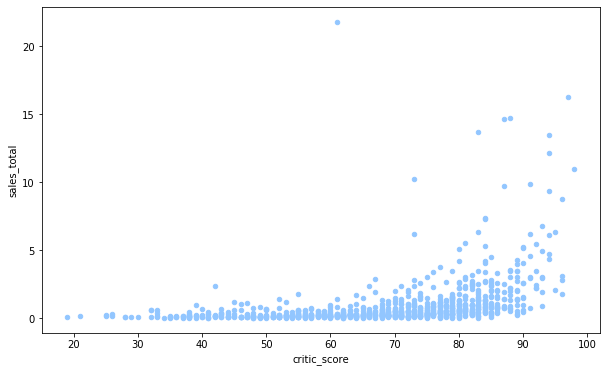

In [354]:
#посомтрим диаграмму рассеяния зависимости общей суммы продаж игры от отзывов критиков:
X360 = games[(games['platform'] == 'X360') & (games['critic_score'] > 0)].copy()
X360.plot(kind='scatter', x='critic_score', y='sales_total', figsize=(10,6))

Чем больше средний рейтинг критиков, тем больше и средний уровень продаж игр

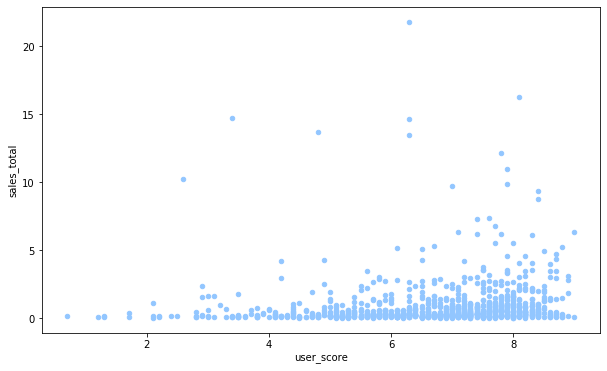

In [355]:
#посомтрим диаграмму рассеяния зависимости общей суммы продаж игры от отзывов пользователей:
X360 = games[(games['platform'] == 'X360') & (games['user_score'] > 0)].copy()
X360.plot(kind='scatter', x='user_score', y='sales_total', figsize=(10,6))

При достаточно небольшом рейтинге пользователей, игра приносит немаленькие деньги. 
Выбросов при рассмотрении зависимостей по рейтингу пользователей больше, чем по ретингу критиков.

In [356]:
#Матрица корреляции:
X360.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_total
year_of_release,1.000000,0.002446,0.058967,-0.096459,0.010701,-0.338495,-0.209484,0.018182
na_sales,0.002446,1.000000,0.861607,0.517835,0.967171,0.289224,0.107923,0.985523
eu_sales,0.058967,0.861607,1.000000,0.495312,0.948581,0.284729,0.108804,0.934743
jp_sales,-0.096459,0.517835,0.495312,1.000000,0.536070,0.254857,0.182321,0.538635
other_sales,0.010701,0.967171,0.948581,0.536070,1.000000,0.303581,0.122790,0.992813
critic_score,-0.338495,0.289224,0.284729,0.254857,0.303581,1.000000,0.518247,0.299014
user_score,-0.209484,0.107923,0.108804,0.182321,0.122790,0.518247,1.000000,0.114459
sales_total,0.018182,0.985523,0.934743,0.538635,0.992813,0.299014,0.114459,1.000000


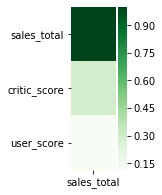

In [357]:
#Посмотрим более подробно по ключевым параметрам:
plt.figure(figsize=(1,3))
sns.heatmap(X360[['sales_total' ,'critic_score', 'user_score']].corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="Greens")

Самая большая зависимость на продажи оказывает оценка критиков. В значительно меньшей стемени влияет оценка пользователей.
При выборе покупки оринетируются на критиковв первую очередь, как на наиболее объективные оценки.

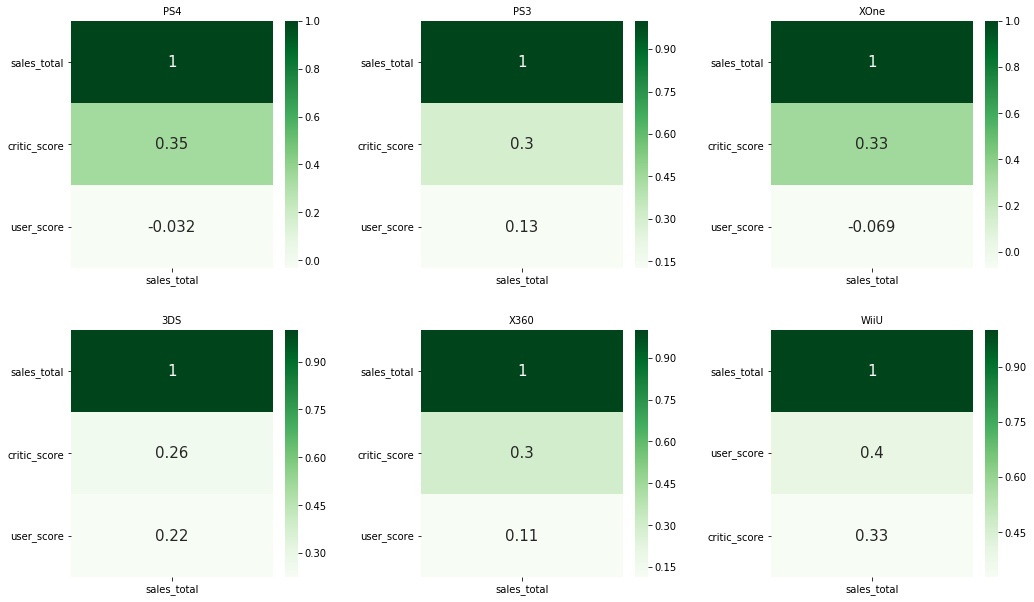

In [358]:
#Данные по корреляции по топовым платформам:
top_platforms = top_platforms_list
cols = 3
rows = len(top_platforms) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15,9))
count = 0
for r in range(rows):
    for c in range(cols):
        df_prep = games[(games['platform'] == top_platforms[count]) & (games['user_score'] > 0)].copy()
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="Greens", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(top_platforms[count], fontsize=10)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Значения корреляции по продажам и оценкой по платформам <del>PS2</del>, X360, PS3 совпадает с общими данными по датафрейму.

Значения корреляции по продажам и оценкой по платформам PS4 и XOne зависят от оценок критиков.

Значения корреляции по продажам для платформы <del>PS</del> 3DS имеют практически одинаковые коэфициенты оценки пользователей и оценки критиков. 

Значения корреляции по продажам и оценкой по платформам Wii <del>и DS</del> отличаются от общих по датафрейму. Оценки пользователей в такой же степени (и даже больше) влияют на продажи как и оценки критиков. Возможно это связано с локальным распространением этих платформ и как следствие меньшим кол-вом оценок игр по ним.

### Распределение игр по жанрам

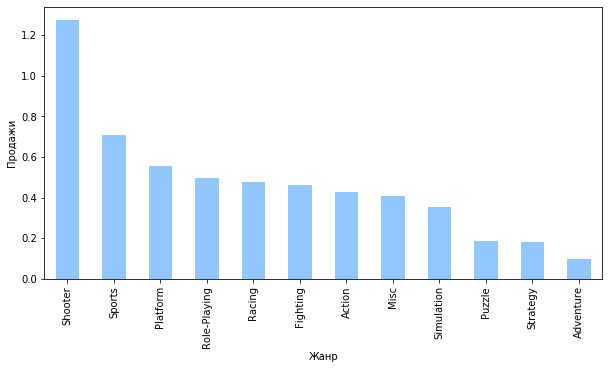

In [359]:
games_actual_period.pivot_table(index='genre', values='sales_total').sort_values('sales_total', ascending=False).plot(kind='bar', y='sales_total', figsize=(10, 5), legend=False).set(xlabel='Жанр', ylabel='Продажи')
plt.show()

[Text(0, 0.5, 'Кол-во'), Text(0.5, 0, 'Жанр')]

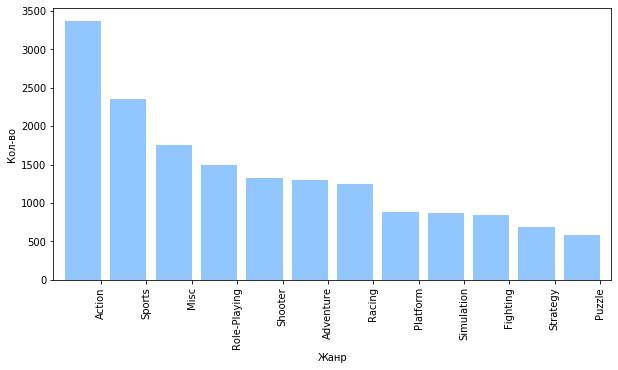

In [360]:
ax = plt.gca()
games.groupby('genre').agg({'name': 'count'}).sort_values(by='name', ascending=False)['name'].plot(kind='bar', figsize=(10,5), ax=ax, width=0.8, position=1).set(xlabel='Жанр', ylabel='Кол-во')

Самые продаваемые жанры: Shooter, Platform, Sports. 
Меньше всего продаж у Adventure, Strategy, Puzzle.

Больше всего игр жанра Action, Sports и Misc. 
Меньше всего игр жанра Puzzle, Strategy, Fighting.

Если сравнивать жанры Action и Sports, то игр Action значительно больше, чем Sports, однако продаж игр жантра Sports больше, чем у Action, т.е. стоимость игр Sports больше Action.
    
Конечно создать игру Puzzle требует значительно меньше усилий, чем игру Action, однако это не влияет на их общее кол-во. 

Также продажи игр конечно будут зависеть от конкуренции в жанре и цене установленной на нее.

## Шаг 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

    самые популярные платформы (топ-5), опишем различия в долях продаж;
    самые популярные жанры (топ-5), поясним разницу;
    определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [361]:
#Функция для построения графиков по региону по выбранному актуальному периоду:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = games_actual_period.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    plot = pivot.plot(kind='pie', y=region_sales, autopct='%1.0f%%', ax=axes[ax], title=region_sales, legend=False, fontsize=18)
    plot.set_ylabel('')
    plot.title.set_size(20)

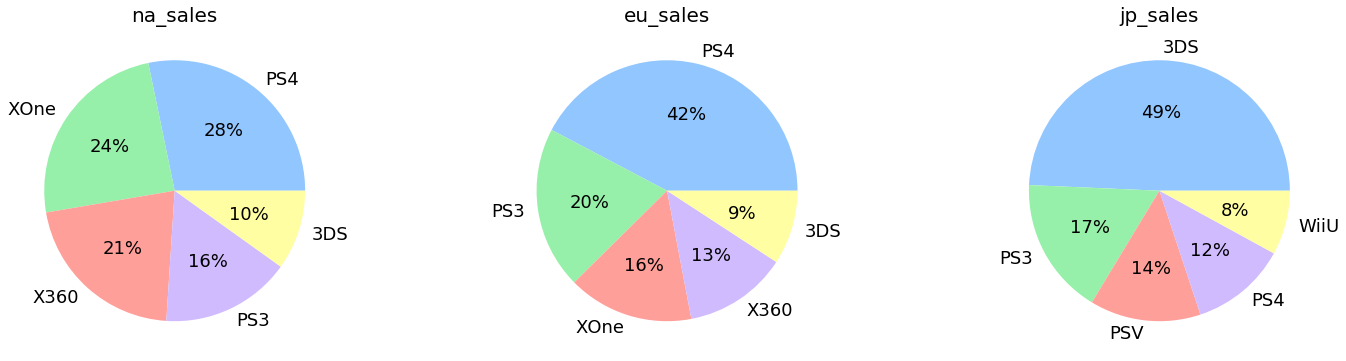

In [362]:
#Самые популярные платформы в регионах:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В Северной Америке наиболее популярны PS4 (доля 28%), на 4% меньше у XOne, следом идет X360 (21%), у PS3 - 16%, а у 3DS - 10%.

В Европе наиболее популярны PS4(доля 42%), на 22% меньше у PS3, у XOne - 16%, а у X360 и 3DS - 13% и 9% соответственно.

В Японии наиболее популярна 3DS (доля 49%), у PS3 17%, у PSV  14%, а PS4 и WiiU имеют 12% и 8% соответственно.

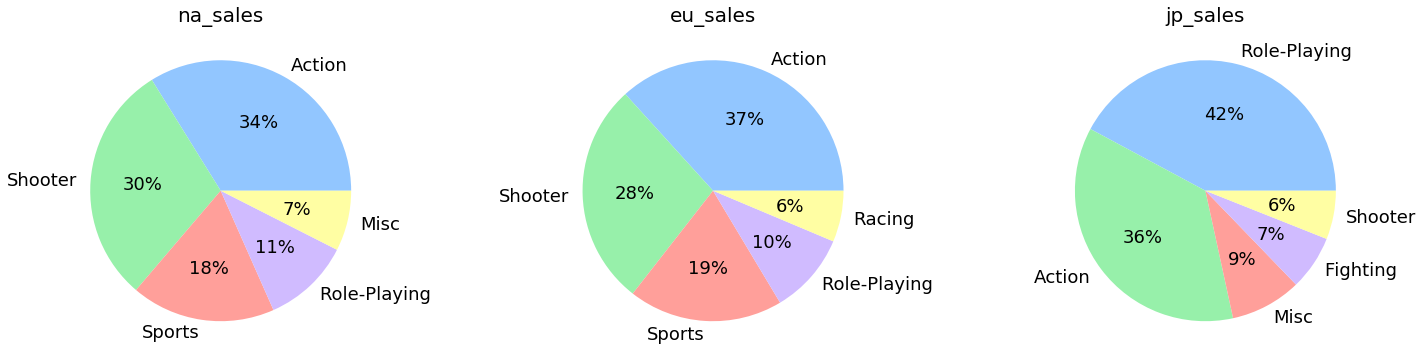

In [363]:

fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

В Северной Америке и Европе наиболее популярны Action и Shooter, следом идут Sports и Role-Playing. Дадее следуют Misc в Америке и Racing в Европе.

В Японии значительно популярен жанр Role-Playing (доля 42%), за которым следуют Action (доля 36%), потом Misc (доля 9%), Fighting (доля 7%) и Shooter (доля 6%).

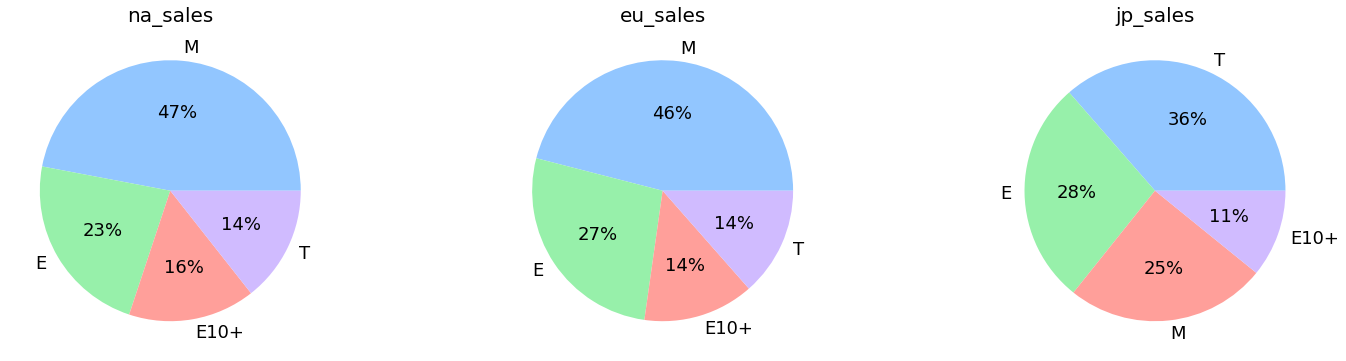

In [364]:
#Влияние рейтинга ESRB на продажи в отдельном регионе.
#Посмотрим на продажи игр по рейтингу:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('rating', 'na_sales', 0)
top_in_regions_plot('rating', 'eu_sales', 1)
top_in_regions_plot('rating', 'jp_sales', 2)

В Северной Америке и в Европе наибольшие продажи у игр с рейтингом M, далее следуют игры с рейтингом E и практически одинаково продаются игры с рейтингом E10+ и T .

В Японии все наоборот и наибольшие продажи у игр с рейтингом T, затем идут игры с ретингом E, и только потом игры с рейтингом M. А продажи игры с рейтингом E10+ приблизительно такое же как и в Северной Америке и в Европе. 

## Шаг 5. Проверка гипотез


    средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    средние пользовательские рейтинги жанров Action и Sports разные.


### Начнем с гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н0 (нулевая гипотеза) - предположение о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.


In [365]:
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
t, p_value = ttest_ind(xbox_one_ratings, pc_ratings)

In [366]:
t

-4.368333815003015

In [367]:
p_value

1.3896435533548819e-05

Значение alpha берем = 0.05.

Нулевую гипотезу отвергаем.

Верно утверждение, что средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой

In [368]:
#Средняя оценка пользователей игр для платформы Xbox One:
xbox_one_ratings.mean()

6.521428571428572

In [369]:
#Средняя оценка пользователей игр для платформы PC:
pc_ratings.mean()

7.062467532467533

In [370]:
#рассчитаем 95% доверительный интервал среднего значения для Xbox One
st.t.interval(0.95, len(xbox_one_ratings)-1, loc=np.mean(xbox_one_ratings), scale=st.sem(xbox_one_ratings))

(6.319452023663737, 6.723405119193408)

In [371]:
#рассчитаем 95% доверительный интервал среднего значения для PC
st.t.interval(0.95, len(pc_ratings)-1, loc=np.mean(pc_ratings), scale=st.sem(pc_ratings))

(6.954232521382893, 7.170702543552173)

PC получает оценки статистически значимо выше, чем Xbox One

### Теперь посмотрим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.

H0 (нулевая гипотеза) - предположение о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.


In [372]:
action_ratings = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports_ratings = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
t, p_value = ttest_ind(action_ratings, sports_ratings)

In [373]:
t

1.6259419280500857

In [374]:
p_value

0.10406951359049141

In [375]:
#Средняя оценка пользователей игр для Action:
action_ratings.mean()

7.054043715846995

In [376]:
#Средняя оценка пользователей игр для Sports:
sports_ratings.mean()

6.961196736174069

In [377]:
#рассчитаем 95% доверительный интервал среднего значения для Action
st.t.interval(0.95, len(action_ratings)-1, loc=np.mean(action_ratings), scale=st.sem(action_ratings))

(6.988693828874478, 7.119393602819512)

In [378]:
#рассчитаем 95% доверительный интервал среднего значения для Sports
st.t.interval(0.95, len(sports_ratings)-1, loc=np.mean(sports_ratings), scale=st.sem(sports_ratings))

(6.8659976054146785, 7.05639586693346)

Значение alpha берем = 0.05.

Нулевую гипотезу отвергнуть не можем.

Верно утверждение, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Общий вывод

-10 лет - характерный срок, когда появляются новые и исчезают старые платформы.

-Для анализа использовался актуальный период: 2013-2016 г, т.к. в этом году уже закончилось падение на рунке, ситуация по продажам стабилизировалась, уже вышло большинство обновлений для плафторм (т.е. мы сможем взять наиболее современнные платформы) и 4 года - достаточно большой период для отслеживания тенденций на рынке.


-По последним данным лидируют по продажам платформы: PS4, Xone, 3DS. Они и являются наиболее перспективными и приоритетными. далее идут платформы: PS3, X360, WiiU. Возможно стоит обратить еще внимание на WiiU, т.к. она появилась только в 2011 г. и может быть перспективной на азиатском рынке.

-Продажи игр по всем платформам падают, в том числе и в 2016 г. Причиной падения, скорее всего явялется развитие мобильных устройств.


-Продажи игр в среднем составляют до 1,08 млн.$

-Медиана - 0,17 млн.$

-Медиана по топовым платформам составляет от 0,2 до 0,27 млн $. 


-Самая большая зависимость на продажи оказывает оценка критиков. В значительно меньшей стемени влияет оценка пользователей. При выборе покупки оринетируются на критиковв первую очередь, как на наиболее объективные оценки. Однако такая ситуация не характеран для Азиатского рынка, где необходимо в равной степени поработать и над оценками пользователей.


-Самые продаваемые жанры: Shooter, Platform, Sports. Меньше всего продаж у Adventure, Strategy, Puzzle.
-Больше всего игр жанра Action, Sports и Misc. Меньше всего игр жанра Puzzle, Strategy, Fighting.
-Если сравнивать жанры Action и Sports, то игр Action значительно больше, чем Sports, однако продаж игр жантра Sports больше, чем у Action, т.е. стоимость игр Sports больше Action. Конечно создать игру Puzzle требует значительно меньше усилий, чем игру Action, однако это не влияет на их общее кол-во.
-Также продажи игр конечно будут зависеть от конкуренции в жанре и цене установленной на нее.
-Также продажи консолей будут зависеть от конкуренции в год выпуска консоли (и предшествующий ему год) и цене установленной на нее.


-В Северной Америке наиболее популярны PS4 (доля 28%), на 4% меньше у XOne, следом идет X360 (21%), у PS3 - 16%, а у 3DS - 10%.

-В Европе наиболее популярны PS4(доля 42%), на 22% меньше у PS3, у XOne - 16%, а у X360 и 3DS - 13% и 9% соответственно.

-В Японии наиболее популярна 3DS (доля 49%), у PS3 17%, у PSV  14%, а PS4 и WiiU имеют 12% и 8% соответственно.


-В Северной Америке и Европе наиболее популярны Action и Shooter, следом идут Sports и Role-Playing. Дадее следуют Misc в Америке и Racing в Европе.

-В Японии значительно популярен жанр Role-Playing (доля 42%), за которым следуют Action (доля 36%), потом Misc (доля 9%), Fighting (доля 7%) и Shooter (доля 6%).


-В Северной Америке и в Европе наибольшие продажи у игр с рейтингом M, далее следуют игры с рейтингом E и практически одинаково продаются игры с рейтингом E10+ и T.

-В Японии все наоборот и наибольшие продажи у игр с рейтингом T, затем идут игры с ретингом E, и только потом игры с рейтингом M. А продажи игры с рейтингом E10+ приблизительно такое же как и в Северной Америке и в Европе. 


-Верно утверждение, что средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

-Верно утверждение, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

Итого: в 2017 г. необходимо разработать отдельные планы действиям в каждом регионе с учетом особенностей перечисленных выше.